# Topic Modelling climat

Ce notebook a pour objectif de regarde les sujets traiter par chacunes des communautés principales et
de les comparer à ce qui se fait dans les médias pro et climato_sc


In [1]:
%cd /
%cd /home/tanguyruault/Documents/Tanguy/hue
%ls

C:\
[WinError 3] Le chemin d’accès spécifié est introuvable: '/home/tanguyruault/Documents/Tanguy/hue'
C:\
 Le volume dans le lecteur C s'appelle Local Disk
 Le num‚ro de s‚rie du volume est 8EC2-149E

 R‚pertoire de C:\

22/11/2019  20:31               349 am_pe_log.txt
16/10/2020  16:07    <DIR>          ExportPhilcarto
23/12/2020  23:55    <DIR>          HDW50_TMP
01/03/2019  06:53    <DIR>          Intel
07/12/2019  11:14    <DIR>          PerfLogs
18/05/2021  16:05    <DIR>          Program Files
14/03/2021  00:10    <DIR>          Program Files (x86)
14/03/2021  00:12    <DIR>          Users
16/05/2021  00:57    <DIR>          Windows
               1 fichier(s)              349 octets
               8 R‚p(s)  17ÿ851ÿ809ÿ792 octets libres


In [2]:
%cd users\Tanguy RUAULT\downloads\data_isc\hue
%ls

C:\users\Tanguy RUAULT\downloads\data_isc\hue
 Le volume dans le lecteur C s'appelle Local Disk
 Le num‚ro de s‚rie du volume est 8EC2-149E

 R‚pertoire de C:\users\Tanguy RUAULT\downloads\data_isc\hue

05/06/2021  22:09    <DIR>          .
05/06/2021  22:09    <DIR>          ..
09/05/2021  19:41    <DIR>          .ipynb_checkpoints
05/06/2021  22:09               267 .Rhistory
28/05/2021  18:43        23ÿ396ÿ322 acc_activity_blm.csv
05/06/2021  22:05           103ÿ442 am_total_geaph.csv
03/06/2021  21:05             1ÿ258 attention_graph.png
05/06/2021  21:02       253ÿ779ÿ943 climateEdge_graph_01102019_30062020_th=2.csv
05/06/2021  21:42               674 example.svg
21/05/2021  09:39            68ÿ549 graph_blm.csv
24/05/2021  15:10           445ÿ938 graph_blm_total.csv
12/05/2021  16:56         3ÿ183ÿ008 portee_comments_users.csv
12/05/2021  17:16         6ÿ717ÿ486 portee_rt_users.csv
14/05/2021  09:38           134ÿ012 texte_gf.csv
15/05/2021  16:13           154ÿ451 texte_gfloyd_

In [3]:
#ouverture du fichier
#with open('texte_gfloyd_1.csv', encoding = 'utf-8') as f:
#    lines = f.readlines()
with open('texte_greta_4.csv', encoding = 'utf-8') as f:
      lines = f.readlines()

#with open('texte_mh_1.csv', encoding = 'utf-8') as f:
 #lines = f.readlines()
    


In [4]:
#### pour faciliter le traitement, on convertit le fichier en une liste de tokens que l'on découpe ensuite en fonction des lignes
file = []
for raw in lines :
    word = raw.split(" ")
    file.append(word)

In [16]:
import nltk
nltk.download('stopwords')
from gensim import corpora
from collections import defaultdict
from nltk.corpus import stopwords


#from spacy.lang.en import LOOKUP
from urllib.parse import urlparse

import argparse
import emoji
import gensim
import numpy as np
import pandas as pd
import re
import string

#on enlève dans un premier temps:
#mentions
#liens https
#ponctuations
#stopwords

#Methode perso
#d = re.sub(r'[^\w\s]', "", corpus)
#d =  re.sub(r'@([A-Za-z0-9]*):',"", d)
#d = re.sub(r'tx|\\n', "", d)
#mots clés en anglais

stopwords = set(stopwords.words('english'))
punct = set(string.punctuation)
clean = []
###on enlève les mots trop généralistes et donc peu signifiants. 
liste = set(list(["greta","thunberg","climate","change","like","para","get","would","need","via","des","says","like","call","still"]))
#liste = set(list(["george","floyd","climate","change"]))
#liste = set(list(["mike","hudema"]))

for element in file :# Convert unicode emoji to shortcode emoji
     element = emoji.demojize(str(element))
         
        # Remove all mentions (@) in the onon
     element = re.sub(r'@\S+ *', '', element)
          # Remove all hashtags (#) in the row
     element = re.sub(r'#\S+ *', '', element)
            #remove all rt in the row
     element = re.sub(r'rt', '',element)
    
   ####remove isolated numbers
     element = re.sub(r'\W+\d+', '', element)
     element = re.sub(r'[\\\;\']', '', element)
     #remove spaces pour prendre en compte les alphanum
     element = re.sub(r'\s', '', element)
     element = element.split(",")
         
        ###conversion en liste de element et de word en str

     element = [word.lower() for word in element if re.sub('\W', '', word)]
     #enlever les url
     #element = [word for word in element if not urlparse(word).scheme]
     #element = [str(word) for word in element]
     #element =   [char for char in element if char not in punct]
     #element = [' '.join(word) for word in element] 
     element = [word for word in element if word.isalpha()]
     element= [word for word in element if word not in stopwords]
        
    ###on enlève les mots clés 
     element= [word for word in element if word not in liste]
     clean.append(element)
    
    


[nltk_data] Downloading package stopwords to C:\Users\Tanguy
[nltk_data]     RUAULT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
clean[2]

['since', 'september', 'inspired', 'millions', 'rally']

In [18]:
# remove words that appear only once
frequency = defaultdict(int)
for text in clean:
    for token in text:
        frequency[token] += 1
len(frequency)

3065

In [19]:
texts = [
    [token for token in text if frequency[token] > 1]
    for text in clean
]

In [20]:
from gensim import models
# Begin building the topic model
dictionary = corpora.Dictionary(texts)



In [21]:
# Print information on the document corpus
print("[INFO] Size of dictionary: {}".format(len(dictionary)))
# Convert the dictionary into a document term matrix
matrix = [dictionary.doc2bow(sent) for sent in texts]

[INFO] Size of dictionary: 1188


## plotter les différentes cohérences

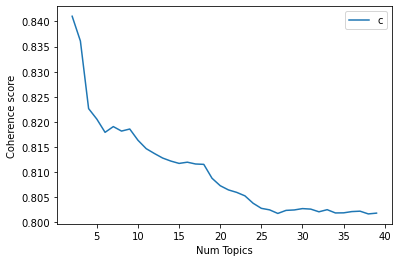

Num Topics = 2  has Coherence Value of 0.841
Num Topics = 3  has Coherence Value of 0.8361
Num Topics = 4  has Coherence Value of 0.8227
Num Topics = 5  has Coherence Value of 0.8206
Num Topics = 6  has Coherence Value of 0.8179
Num Topics = 7  has Coherence Value of 0.8191
Num Topics = 8  has Coherence Value of 0.8182
Num Topics = 9  has Coherence Value of 0.8186
Num Topics = 10  has Coherence Value of 0.8164
Num Topics = 11  has Coherence Value of 0.8147
Num Topics = 12  has Coherence Value of 0.8137
Num Topics = 13  has Coherence Value of 0.8128
Num Topics = 14  has Coherence Value of 0.8122
Num Topics = 15  has Coherence Value of 0.8117
Num Topics = 16  has Coherence Value of 0.812
Num Topics = 17  has Coherence Value of 0.8116
Num Topics = 18  has Coherence Value of 0.8116
Num Topics = 19  has Coherence Value of 0.8088
Num Topics = 20  has Coherence Value of 0.8073
Num Topics = 21  has Coherence Value of 0.8065
Num Topics = 22  has Coherence Value of 0.806
Num Topics = 23  has Coh

In [22]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
def compute_coherence_values(id2words, texts,start,limit, step):

    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(id2word=id2words,
                                              num_topics=num_topics,
                                              random_state=1, 
                                              update_every=1,
                                              chunksize=100,
                                              passes=10, 
                                              alpha='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = gensim.models.coherencemodel.CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=id2words,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Calculer les scores de cohérence entre 2 et 40 topics (Cela peut prendre un certain temps)
model_list, coherence_values = compute_coherence_values(dictionary,texts, start=2, limit=40, step=1)
# Afficher un graphique
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Affchier les coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


### Avec un nombre fixe de topics

In [25]:
size = 5
nwords = 20
# Initialize the LDA model from gensim
lda = gensim.models.ldamodel.LdaModel

# Train the model on the document term matrix
model = lda(matrix, num_topics=size, id2word=dictionary, passes=size,
            iterations=size)
    # Initialize the coherence evaluation model from gensim
cm = gensim.models.coherencemodel.CoherenceModel(model=model,
                                                 texts=texts,
                                                 coherence='c_v',
                                                 topn=size
                                                 )
    # Get the coherence of each topic and round the values : pour chaque itération, nombre de cohérences correspond au nombre de topics. 
values = cm.get_coherence_per_topic()
coherence = [round(score, 3) for score in values] 





In [26]:
# Print topics
topics = model.show_topics(num_topics=size, num_words=nwords, formatted=True)
# Add a placeholder list to hold the final output
result = []

# Loop over the topics
for t in topics:

    # Assign the word string into their own variable
    words = t[1]

    # Split the words
    words = words.split(' + ')

    # Extract the words from the predictions
    words = [w.split('*')[1].strip('"') for w in words]

    # Append the row to the final result
    result.append(words)
    
# Append the coherence scores (Cv) to the matrix
# Convert the result into a NumPy array and transpose.
result = np.vstack(result).transpose()
result = np.vstack([result, coherence])
# Convert the result into a DataFrame
result = pd.DataFrame(result)
result



,0,1,2,3,4
0,activist,activist,world,activist,us
1,global,people,people,global,new
2,george,speech,activist,teen,crisis
3,year,leaders,crisis,trump,leaders
4,warming,young,school,crisis,protest
5,time,world,leaders,take,much
6,crisis,things,young,swedish,house
7,le,news,right,environmental,world
8,make,schoolgirl,news,warming,activist
9,person,us,global,fight,david


In [27]:
%cd \users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures\figures_m2
%ls

C:\users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures\figures_m2
 Le volume dans le lecteur C s'appelle Local Disk
 Le num‚ro de s‚rie du volume est 8EC2-149E

 R‚pertoire de C:\users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures\figures_m2

04/06/2021  14:32    <DIR>          .
04/06/2021  14:32    <DIR>          ..
28/05/2021  22:33    <DIR>          attention_evenements
03/06/2021  21:05            61ÿ581 attention_graph.png
02/06/2021  16:47             1ÿ258 attention_graph_gf.png
02/06/2021  17:50    <DIR>          captures_ecran
03/06/2021  21:34             6ÿ062 centralite_pdt_12.png
31/05/2021  23:15    <DIR>          graphiques
01/06/2021  16:40               149 main_centralities.csv
02/06/2021  12:30             3ÿ187 main_recruters.csv
26/05/2021  11:45    <DIR>          mediacloud
31/05/2021  12:58            53ÿ460 memoire_m2.txt
30/05/2021  16:28            58ÿ758 stories-day (1)

In [28]:
#result.to_latex("tm_g_floyd_nt=6.tex")
result.to_latex("tm_gt_rt=1.tex")

In [35]:


# Print out a LaTeX table
print(result.to_latex(na_rep='--', index=False))
In [ ]:

In [ ]:

In [39]:
sents = []
if len(row) > 0:
            row = row.split()
            sents.append(row)
Out[39]:
''
In [34]:
# calcul des bigrams
bigrams_list = []
for i in range(0 , len(text) - 1):
  bigram = text[i] + " " + text[i+1]
  bigrams_list.append(bigram)

print(bigrams_list[1])
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-34-44a097b82998> in <module>
      1 # calcul des bigrams
      2 bigrams_list = []
----> 3 for i in range(0 , len(text) - 1):
      4   bigram = text[i] + " " + text[i+1]
      5   bigrams_list.append(bigram)

NameError: name 'text' is not defined
In [95]:
#calcul des trigrams

trigrams_list = []
for i in range(0 , len(text) - 2):
  trigram = text[i] + " " + text[i+1] + " " + text[i+2]
  trigrams_list.append(trigram)

print(trigrams_list[2])
change predictive garbage
In [1]:
# Count word frequencies
frequency = defaultdict(int)
for token in text:
        frequency[token] += 1    
        
freq = pd.DataFrame.from_dict(frequency, orient = "index").sort_values(by=[0], ascending = False)
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-1-cdf0c2007d51> in <module>
      1 # Count word frequencies
----> 2 frequency = defaultdict(int)
      3 for token in text:
      4         frequency[token] += 1
      5 

NameError: name 'defaultdict' is not defined
In [102]:
# Count bigrams frequencies
bi_frequency = defaultdict(int)
for token in bigrams_list:
        bi_frequency[token] += 1
        
        
bi_freq = pd.DataFrame.from_dict(bi_frequency, orient = "index")
bi_freq= bi_freq.sort_values(by=[0], ascending = False)
Out[102]:
0
global warming	380
carbon tax	219
about climate	93
climate crisis	60
sea ice	57
...	...
sklippitt cosmic_engineer	21
trudeau liberals	21
polar bears	21
terrymorse stevecl58542482	21
change not	21
99 rows × 1 columns

In [33]:
# Count trigrams frequencies
tri_frequency = defaultdict(int)
for token in trigrams_list:
        tri_frequency[token] += 1
        
        
tri_freq = pd.DataFrame.from_dict(tri_frequency, orient = "index")
tri_freq = tri_freq.sort_values(by=[0], ascending = False)


# on remarque que c'est peu pertinent, on se concentre d'abord sur les mots et les bigrams
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-33-a4de6516e5f4> in <module>
      1 # Count trigrams frequencies
      2 tri_frequency = defaultdict(int)
----> 3 for token in trigrams_list:
      4         tri_frequency[token] += 1
      5 

NameError: name 'trigrams_list' is not defined
In [32]:

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-32-0921cf8e9781> in <module>
      2 
      3 
----> 4 frequency.doc2idx(["a", "a", "c", "not_in_dictionary", "c"])

AttributeError: 'collections.defaultdict' object has no attribute 'doc2idx'
In [32]:
# Count bigrams frequencies
frequency = defaultdict(int)
for token in bigrams_list:
        frequency[token] += 1
frequency
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-32-a97ed0b5eb1a> in <module>
      1 # Count bigrams frequencies
      2 frequency = defaultdict(int)
----> 3 for token in bigrams_list:
      4         frequency[token] += 1
      5 frequency

NameError: name 'bigrams_list' is not defined
In [36]:

Out[36]:
''
In [31]:
dictionary = corpora.Dictionary(sents)
Out[31]:
<gensim.corpora.dictionary.Dictionary at 0x1b11236b280>
In [29]:
matrix = [dictionary.doc2bow(sent) for sent in sents]
In [30]:

Out[30]:
[]
In [ ]:


SyntaxError: invalid syntax (<ipython-input-35-a5c848965d1e>, line 20)

In [29]:
####analyse qualitative par échantillonage

 Le volume dans le lecteur C s'appelle Local Disk
 Le num‚ro de s‚rie du volume est 8EC2-149E

 R‚pertoire de C:\users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures\figures_m2

06/06/2021  13:26    <DIR>          .
06/06/2021  13:26    <DIR>          ..
28/05/2021  22:33    <DIR>          attention_evenements
03/06/2021  21:05            61ÿ581 attention_graph.png
02/06/2021  16:47             1ÿ258 attention_graph_gf.png
02/06/2021  17:50    <DIR>          captures_ecran
03/06/2021  21:34             6ÿ062 centralite_pdt_12.png
06/06/2021  13:26            55ÿ465 graph_greta_laplacian.png
06/06/2021  08:45    <DIR>          graphiques
01/06/2021  16:40               149 main_centralities.csv
02/06/2021  12:30             3ÿ187 main_recruters.csv
26/05/2021  11:45    <DIR>          mediacloud
31/05/2021  12:58            53ÿ460 memoire_m2.txt
30/05/2021  16:28            58ÿ758 stories-day (1).png
30/05/2021  16:24            68ÿ727 stories-

In [32]:
%cd \users\Tanguy RUAULT\downloads\data_isc\hue
%ls

C:\users\Tanguy RUAULT\downloads\data_isc\hue
 Le volume dans le lecteur C s'appelle Local Disk
 Le num‚ro de s‚rie du volume est 8EC2-149E

 R‚pertoire de C:\users\Tanguy RUAULT\downloads\data_isc\hue

06/06/2021  13:19    <DIR>          .
06/06/2021  13:19    <DIR>          ..
09/05/2021  19:41    <DIR>          .ipynb_checkpoints
05/06/2021  22:09               267 .Rhistory
28/05/2021  18:43        23ÿ396ÿ322 acc_activity_blm.csv
05/06/2021  22:05           103ÿ442 am_total_geaph.csv
03/06/2021  21:05             1ÿ258 attention_graph.png
05/06/2021  21:02       253ÿ779ÿ943 climateEdge_graph_01102019_30062020_th=2.csv
06/06/2021  12:50           511ÿ499 com_greta.csv
05/06/2021  21:42               674 example.svg
21/05/2021  09:39            68ÿ549 graph_blm.csv
24/05/2021  15:10           445ÿ938 graph_blm_total.csv
06/06/2021  09:07         2ÿ845ÿ216 graph_greta_com.csv
12/05/2021  16:56         3ÿ183ÿ008 portee_comments_users.csv
12/05/2021  17:16         6ÿ717ÿ486 portee_rt_us

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 1440: character maps to <undefined>